# Measures of Bandwidth

* Previously, we computed the *power spectral density* (short, the spectrum or PSD) of digitally modulated signals.
* For linearly modulated signals, $s(t) = \sum_n s[n] \cdot p(t-nT)$, the spectrum depends primarily on the pulse shape.
* We have shown that the PSD $S(f)$ depends on:
    * the average symbol energy $E_s$
    * the symbol period $T$ or the symbol rate $R=1/T$
    * and the pulse shape $p(t)$ (via it's Fourier transform $P(f)$)

* The PSD of the modulated signal is given by:
$$
    S(f) = \frac{E_s}{T} |P(f)|^2. 
$$.
* For finite-duration pulses, the Fourier transform $P(f)$ and, therefore, the spectrum $S(f)$ is infinite.
    * it spans all frequencies.
* Today, we introduce three quantitative measures of signal bandwidth.
    * Intent: capture both the width of the main lobe and the side-lobe decay.

In [1]:
# import standard libraries",
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns_context = "notebook"
sns.set_theme(context=sns_context, style="ticks")

## Running Examples

We will use three pulse shapes as our examples:

* rectangular pulse
* half-sine pulse
* sine-squared pulses

### Example: Rectangular Pulse

The rectangular pulse is defined as
$$
p_r(t) = \begin{cases}
    \frac{1}{\sqrt{T}} & \text{for $0\leq t < T$}\\
    0 & \text{else.}
\end{cases}
$$

The Fourier Transform for this pulse is well known:
$$
P_r(f) = \sqrt{T} \text{sinc}(\pi f T) e^{-j\pi f T}.
$$

Therefore, the power spectral density of a digitally modulated signal with rectangular pulse shaping is
$$
S(f) = E_s \text{sinc}^2(\pi f T).
$$

We can compute this Fourier transform easily.

In [2]:
def FT_rect_pulse(ff, T=1):
    """compute the Fourier transform of a rectangular pulse"""

    return np.sqrt(T) * np.sinc(ff * T) * np.exp(-1j*np.pi*ff*T)  # np.sinc includes pi!

### Example: Half-Sine Pulse

A smoother pulse is the half-sine pulse, defined as
$$
p_{hs}(t) = \begin{cases}
\sqrt{\frac{2}{T}} \sin(\pi t / T) & \text{for $0 \leq t < T$}\\
0 & \text{else.}
\end{cases}
$$

The Fourier transform of this pulse is also readily computed. It is equal to 
$$
P_{hs}(f) = \sqrt{2T} \cdot \frac{2}{\pi} \cdot \frac{\cos(\pi fT)}{1-4(fT)^2} \cdot e^{-j\pi fT}.
$$
The value of $P_{hs}(f)$ when $4(fT)^2 = 1$, can be computed using L'Hospital's rule: $P_{hs}(\frac{1}{2T}) = \sqrt{\frac{T}{2}}$.

Here is a function to compute $P_{hs}(f)$.

In [3]:
def FT_half_sine_pulse(ff, T=1):
    """Compute the Fourier transform of the half-sine pulse"""
    # find the frequencies that must be dealt with separately
    f_crit  = np.abs((np.abs(ff) - 0.5/T)) < 1e-8
    f_safe = ff[f_crit]
    ff[f_crit] = 0

    # compute all the non-critical values
    P = np.sqrt(2*T) * 2/np.pi * np.cos(np.pi*ff*T) / (1-4*(ff*T)**2)
    
    # insert the critical values
    P[f_crit] = np.sqrt(T/2)

    # restore ff
    ff[f_crit] = f_safe

    return P * np.exp(-1j*np.pi*ff*T)
    

### Example: Sine-Squared Pulse

An even smoother pulse is the sine-squared pulse, defined as
$$
p_{ss}(t) = \begin{cases}
\sqrt{\frac{8}{3T}} \sin^2(\pi t / T) & \text{for $0 \leq t < T$}\\
0 & \text{else.}
\end{cases}
$$

The Fourier transform of this pulse can be computed. It is equal to 
$$
P_{ss}(f) = \sqrt{\frac{2T}{3}} \cdot \frac{1}{1-(fT)^2} \cdot \text{sinc}(\pi fT) \cdot e^{-j\pi fT}.
$$

The value of $P_{ss}(f)$ when $fT = 1$, can be computed using L'Hospital's rule: $P_{ss}(\frac{1}{T}) = \frac{1}{2} \sqrt{\frac{2T}{3}} = \sqrt{\frac{T}{6}}$.


Here is a function to compute $P_{ss}(f)$.

In [4]:
def FT_sine_squared_pulse(ff, T=1):
    """Compute the Fourier transform of the sine-squared pulse"""
    # find the frequencies that must be dealt with separately
    f_crit  = np.abs((np.abs(ff) - 1/T)) < 1e-8
    f_safe = ff[f_crit]
    ff[f_crit] = 0

    # compute all the non-critical values
    P = np.sqrt(2*T/3) * 1/(1-(ff*T)**2) * np.sinc(ff*T)
    
    # insert the critical values
    P[f_crit] = np.sqrt(0.5*T/3)

    # restore ff
    ff[f_crit] = f_safe

    return P * np.exp(-1j*np.pi*ff*T)

### Qualitative Comparison of Power Spectral Densities

* We plot the PSD for our three example pulses to gain a qualitative understanding of the different spectra.
  * The PSD is plotted in dB so that the side-lobe decay can be observed.


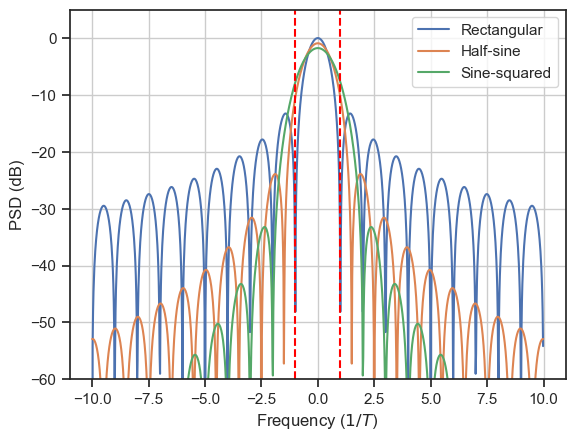

In [6]:
# set Es and T to 1 for normalization
Es = 1
T = 1

# make a frequency grid; 1024 points between -fmax and fmax
fmax = 10/T
ff = np.arange(-fmax, fmax, 2*fmax/1024)

plt.plot(ff, 10*np.log10(Es*np.abs(FT_rect_pulse(ff, T))**2), label='Rectangular')
plt.plot(ff, 10*np.log10(Es*np.abs(FT_half_sine_pulse(ff, T))**2), label='Half-sine')
plt.plot(ff, 10*np.log10(Es*np.abs(FT_sine_squared_pulse(ff, T))**2), label='Sine-squared')


plt.grid()
plt.xlabel('Frequency ($1/T$)')
plt.ylabel('PSD (dB)')

plt.axvline(T, color='red', linestyle='--')
plt.axvline(-T, color='red', linestyle='--')

plt.legend()
plt.ylim(-60, 5)

plt.show()

* All three spectra have a clearly defined main lobe.
  + The main lobe of the rectangular pulse is the narrowest
  + The other two pulses' main lobes are slightly wider
* On the logarithmic scale, it is very clear that the side-lobes of the half-sine pulse decay much more quickly.
 + for the rectangular pulse, side-lobes decay like $1/|f|^2$
 + for the half-sine pulse, decay is proportional to $1/|f|^4$.
 + for the sine-squared pulse, decay is proportional to $1/|f|^6$.
 
* This is an import difference!
  * assume that out-of-band emissions must be 40dB lower than the peak of the PSD
  * the sine-squared pulse meets this requirement for  $|f| >3/T$.
  * the half-sine pulse meets this requirement for $|f| >5/T$.
  * the rectangular pulse does not reach this level for the frequencies shown here.

* Let's look at the center of the PSD more closely.

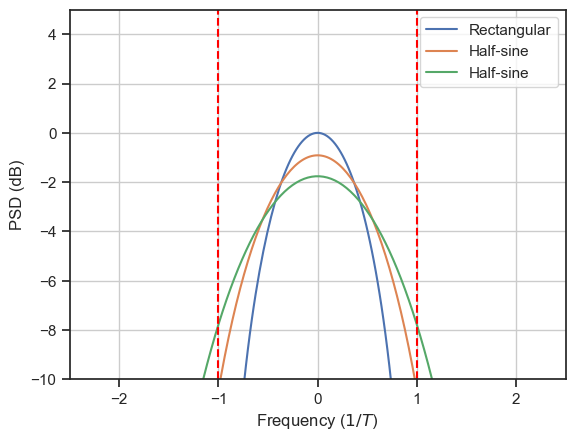

In [9]:
plt.plot(ff, 10*np.log10(np.abs(FT_rect_pulse(ff, 1))**2), label='Rectangular')
plt.plot(ff, 10*np.log10(np.abs(FT_half_sine_pulse(ff, 1))**2), label='Half-sine')
plt.plot(ff, 10*np.log10(np.abs(FT_sine_squared_pulse(ff, 1))**2), label='Half-sine')

plt.grid()
plt.xlabel('Frequency ($1/T$)')
plt.ylabel('PSD (dB)')

plt.axvline(T, color='red', linestyle='--')
plt.axvline(-T, color='red', linestyle='--')

plt.legend()
plt.ylim(-10, 5)
plt.xlim(-2.5/T, 2.5/T)

plt.show()

* The width of the mainlobe for the rectangular pulse is $2/T$; from $-1/T$ to $1/T$.
    + this corresponds to the first zeros of $\text{sinc}(\pi fT)$
* The width of the mainlobe for the half-sine pulse is $3/T$; from $-1.5/T$ to $1.5/T$.
    + this corresponds to the zeros of $\cos(\pi fT)$ for $|f| > 1/(2T)$
    + Recall that for $|f| = 1/(2T)$, the Fourier transform is not zero.
* The width of the mainlobe for the half-sine pulse is $4/T$; from $2/T$ to $2/T$.
    + this corresponds to the zeros of $\sin(\pi fT)$ for $|f| > 1/(T)$
    + Recall that for $|f| = 1/T$, the Fourier transform is not zero.

## Measures of Bandwidth

* Being able to plot the PSD provides a lot of insight; key questions are
  + how wide is the main lobe?
  + how quickly do the side-lobes decay?
  + how well is power concentrated near $f=0$?
* It would be nice to have a single number that measures the bandwidth of the signal accurately.
  + **one-sided** bandwidth: measures bandwidth only for positive frequencies
  + **two-sided** bandwidth: measures bandwidth using positive and negative frequencies
    - two-sided bandwidth is always two times the one-sided bandwidth
    - two-sided bandwidth is relevant for passband signal (in wireless communications)
    - unless otherwise stated, we will measure two-sided bandwidth

### 3dB Bandwidth

* 3dB bandwidth is measured relative to the peak of the PSD $S(f)$.
  * it measures the range of frequencies such that $S(f) \geq 0.5 \cdot \text{max}(S(f))$
  * at which frequency is the PSD 3dB down from the peak?
  * **Obvious short-coming:** does not consider side-lobe decay

* Example: half-sine pulse is plotted below.

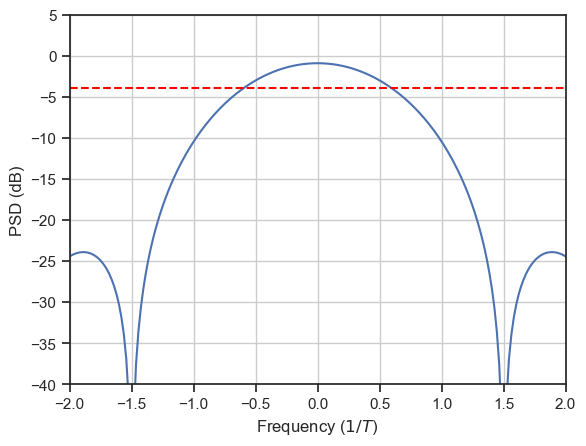

In [10]:
plt.plot(ff, 10*np.log10(np.abs(FT_half_sine_pulse(ff, 1))**2), label='Half-sine')

plt.grid()
plt.xlabel('Frequency ($1/T$)')
plt.ylabel('PSD (dB)')

plt.axhline(10*np.log10(0.5*np.max(np.abs(FT_half_sine_pulse(ff, 1))**2)), color='red', linestyle='--')

plt.ylim(-40, 5)
plt.xlim(-2/T, 2/T)

plt.show()

In [11]:
def bandwidth_3dB(ff, SS):
    """find the 3dB bandwidth of the spectrum SS"""

    # find the peak of the PSD
    peak = np.max(SS)

    # find the location spectrum value closest to 0.5 * peak
    loc = np.argmin(np.abs(SS - 0.5*peak))

    # ff[loc] is either a positive or negative frequency where S(f) = 0.*peak
    # 3dB bandwidth is twice the absolute value of this quantity
    return 2 * abs(ff[loc])

In [12]:
# make a frequency grid; 1024 points between -fmax and fmax
fmax = 16/T
ff = np.arange(-fmax, fmax, 2*fmax/4096)
S_hs = np.abs(FT_half_sine_pulse(ff, T))**2
S_r = np.abs(FT_rect_pulse(ff, T))**2
S_ss = np.abs(FT_sine_squared_pulse(ff, T))**2

print(f"The 3dB bandwidth of the rectangular pulse is {bandwidth_3dB(ff, S_r):4.2f} * 1/T")
print(f"The 3dB bandwidth of the half-sine pulse is {bandwidth_3dB(ff, S_hs):4.2f} * 1/T")
print(f"The 3dB bandwidth of the sine-squared pulse is {bandwidth_3dB(ff, S_ss):4.2f} * 1/T")


The 3dB bandwidth of the rectangular pulse is 0.89 * 1/T
The 3dB bandwidth of the half-sine pulse is 1.19 * 1/T
The 3dB bandwidth of the sine-squared pulse is 1.44 * 1/T


### Zero-zero Bandwidth

* zero-to-zero bandwidth measure the width between the zeros of the spectrum that are closest to $f = 0$.
  * This measure also does not consider side lobes
  * Also, not all pulses have zeros in their Fourier transform
  * If the PSD has zeros, this is very easy to measure

In [13]:
def bandwidth_zz(ff, SS):
    """find the zero-to-zero bandwidth of the spectrum SS"""

    # find the location od  the peak of the PSD
    loc = np.argmax(SS)
    peak = SS[loc]

    # search for the first time, we get close to zero
    while(SS[loc] > 1e-6 * peak):
        loc += 1

    # ff[loc] is either a positive or negative frequency where S(f) = 0.*peak
    # 3dB bandwidth is twice the absolute value of this quantity
    return 2 * abs(ff[loc])

In [14]:
print(f"The zero-to-zero bandwidth of the rectangular pulse is {bandwidth_zz(ff, S_r):4.1f} * 1/T")
print(f"The zero-to-zero bandwidth of the half-sine pulse is {bandwidth_zz(ff, S_hs):4.1f} * 1/T")
print(f"The zero-to-zero bandwidth of the sine-squared pulse is {bandwidth_zz(ff, S_ss):4.1f} * 1/T")


The zero-to-zero bandwidth of the rectangular pulse is  2.0 * 1/T
The zero-to-zero bandwidth of the half-sine pulse is  3.0 * 1/T
The zero-to-zero bandwidth of the sine-squared pulse is  4.0 * 1/T


### $\alpha$% Containment bandwidth

* the containment bandwidth $B_{\alpha}$ is a more comprehensive measure of bandwidth.
* It measure what range of frequencies contain $\alpha$ percent of the total power
* It is defined as
$$
    \int_{-B_{\alpha}/2}^{B_{\alpha}/2} S(f) df = \alpha \cdot \int_{-\infty}^{\infty} S(f) df = P.
$$
* This measure includes both the main lobe and the sidelobes
* it must be computed numerically.

In [15]:
def bandwidth_containment(ff, SS, alpha):
    """find the alpha containment bandwidth bandwidth of the spectrum SS"""
    # total power
    P = np.sum(SS)

    # find the location od  the peak of the PSD
    loc = np.argmax(SS)
    peak = SS[loc]

    acc = P/2
    loc += 1
    # accumulate power until we get to alpha*P
    while(acc < (1 - (1 - alpha)/2) * P):
        acc += SS[loc]
        loc += 1

    # ff[loc] is either a positive or negative frequency 
    return 2 * abs(ff[loc])

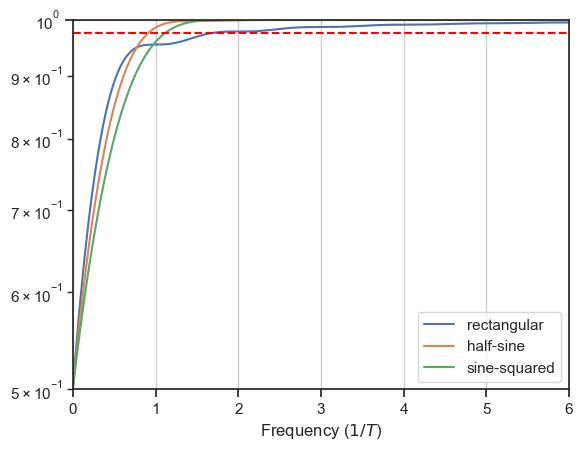

In [16]:
# plot the integral over S(f) and 97.5% line
plt.semilogy(ff, np.cumsum(S_r)/sum(S_r), label='rectangular')
plt.semilogy(ff, np.cumsum(S_hs)/sum(S_hs), label='half-sine')
plt.semilogy(ff, np.cumsum(S_ss)/sum(S_ss), label='sine-squared')

plt.grid()
plt.axhline(0.975, color='red', linestyle='--')
plt.axhline(0.025, color='red', linestyle='--')

plt.xlim(0, 6)
plt.ylim(0.5, 1)
plt.legend()

plt.xlabel('Frequency ($1/T$)')
plt.show()


In [40]:
print(f"The 95% containment bandwidth of the rectangular pulse is {bandwidth_containment(ff, S_r, 0.95):4.2f} * 1/T")
print(f"The 95% containment bandwidth of the half-sine pulse is {bandwidth_containment(ff, S_hs, 0.95):4.2f} * 1/T")
print(f"The 95% containment bandwidth of the sine-squared pulse is {bandwidth_containment(ff, S_ss, 0.95):4.2f} * 1/T")

The 95% containment bandwidth of the rectangular pulse is 4.52 * 1/T
The 95% containment bandwidth of the half-sine pulse is 1.89 * 1/T
The 95% containment bandwidth of the sine-squared pulse is 2.30 * 1/T


### Computing the Fourier Transform numerically

We can show that the Fourier Transform
$$
P(f) = \int p(t) e^{-j2\pi ft}dt
$$
can be approximated from samples $p[n]$ of $p(t)$ at rate $f_s$
$$
P(f) \approx \frac{1}{f_s} \sum_n p(n/f_s) e^{-j2\pi \frac{nf}{f_s}}.
$$

Further, we compute the Fourier Transform only at a discrete set of frequencies $f = k \frac{f_s}{N}$ for $-N/2 \leq k < N/2$,
$$
P(kf_s/N) \approx \frac{1}{f_s} \sum_n p(n/f_s) e^{-j2\pi \frac{kn}{N}},
$$
where the number of frequency samples $N$ must satisfy:
* $N \geq  \text{length}(p[n])$; if $p[n]$ is shorter than $N$, $p[n]$ is padded with zeros to length $N$
* Frequency resolution $f_s/N \ll \frac{1}{T}$, i.e., $N \gg fsT$ 
* $N$ should be a power of 2 to allow for a fast FFT algorithm.

In [15]:
def numerical_FT(pp, fs, N):
    """compute Fourier transform numerically"""

    assert len(pp) <= N, "pukse is too long"

    # zero-pad pp
    padded = np.zeros(N, dtype=complex)
    padded[:len(pp)] = pp

    # compute DFT (using FFT)
    PP = np.fft.fftshift(np.fft.fft(padded)) / fs

    return PP

In [16]:
## rectangular pulse
T = 1
fs = 32
fsT = int(fs*T)

N_FFT = 1024
pp = np.ones(fsT)
PP = numerical_FT(pp, fs, N=N_FFT)

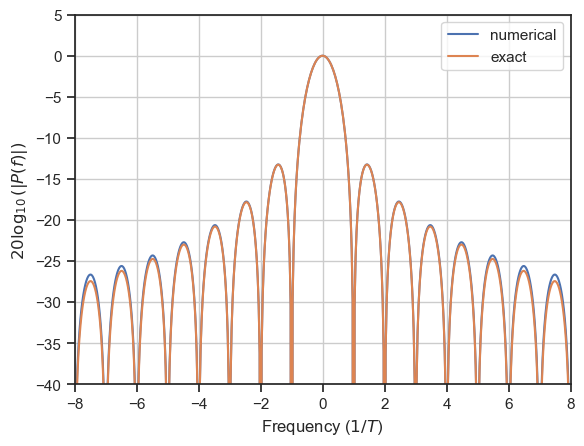

In [17]:
ff = np.arange(-N_FFT/2, N_FFT/2)/N_FFT*fs
Pt = FT_rect_pulse(ff, T)

plt.plot(ff, 
         20*np.log10(np.abs(PP+1e-8)), label="numerical")
plt.plot(ff, 
         20*np.log10(np.abs(Pt)), label='exact')
plt.xlabel('Frequency ($1/T$)')
plt.ylabel('$20\log_{10}(|P(f)|)$')
plt.legend()
plt.grid()

plt.ylim(-40, 5)
plt.xlim(-fs/4, fs/4)

plt.show()

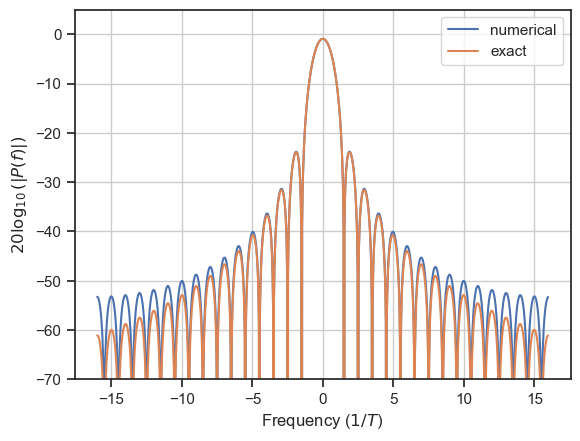

In [18]:
## half-sine pulse
pp_hs = np.sqrt(2/T) * np.sin(np.pi*np.arange(fsT)/fsT)
PP_hs = numerical_FT(pp_hs, fs, N=N_FFT)

# exact
PP_hs_t = FT_half_sine_pulse(ff, T)

plt.plot(ff, 
         20*np.log10(np.abs(PP_hs)), label="numerical")
plt.plot(ff, 
         20*np.log10(np.abs(PP_hs_t)), label='exact')
plt.xlabel('Frequency ($1/T$)')
plt.ylabel('$20\log_{10}(|P(f)|)$')
plt.legend()
plt.grid()

plt.ylim(-70, 5)

plt.show()


(-5.0, 5.0)

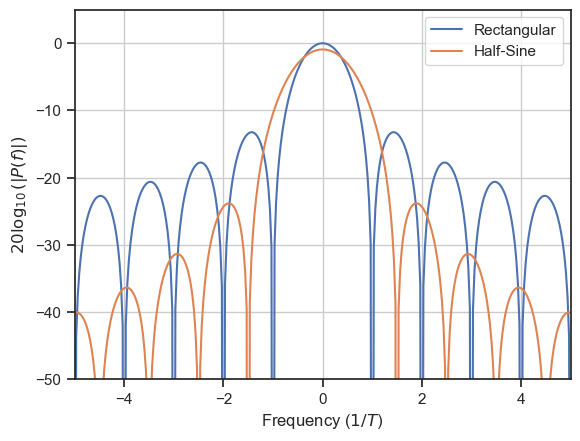

In [ ]:
## Comparison of rectangular and half_sine spectra
plt.plot(ff, 
         20*np.log10(np.abs(PP+1e-8)), label="Rectangular")
plt.plot(ff, 
         20*np.log10(np.abs(PP_hs)), label='Half-Sine')
plt.xlabel('Frequency ($1/T$)')
plt.ylabel('$20\log_{10}(|P(f)|)$')
plt.legend()
plt.grid()

plt.ylim(-50, 5)
plt.xlim(-5,5)